In [2]:
import numpy as np
import xarray as xr
import xrft
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dt = 1e2
f0 = -1.1e-4

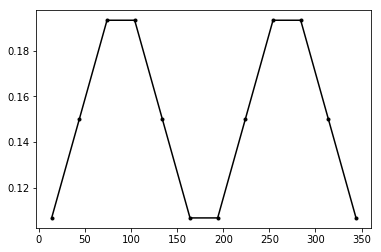

In [4]:
tau_const = 0.15
tau_ideal = tau_const - 0.05*np.cos(np.pi/3*np.arange(0.5,12.5))
plt.plot(range(14,360,30),tau_ideal, 'k.-')

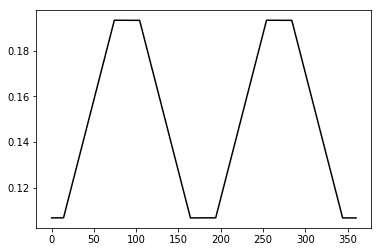

In [11]:
func = interp1d(range(14*86400,360*86400,30*86400), tau_ideal)
tt = np.arange(0,360*86400,dt)
tau_intp = np.ones_like(tt)*tau_ideal[0]
tau_intp[int(14*86400/dt):int(344*86400/dt)] = func(np.arange(14*86400,344*86400,dt))
plt.plot(np.arange(0,360*86400,dt)/86400,tau_intp, 'k')

In [13]:
tauf = xrft.power_spectrum(xr.DataArray(tau_intp, dims=['time'], coords={'time':tt}), 
                           dim=['time'], density=False, detrend='constant')
tauf

<xarray.DataArray (freq_time: 311040)>
array([9.437057e-33, 2.373138e-30, 8.372450e-12, ..., 6.019854e-32,
       8.372449e-12, 6.847044e-30])
Coordinates:
  * freq_time          (freq_time) float64 -0.005 -0.005 -0.005 -0.005 ...
    freq_time_spacing  float64 3.215e-08

(array([1.e-46, 1.e-41, 1.e-36, 1.e-31, 1.e-26, 1.e-21, 1.e-16, 1.e-11,
        1.e-06, 1.e-01, 1.e+04, 1.e+09]),
 <a list of 12 Text yticklabel objects>)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


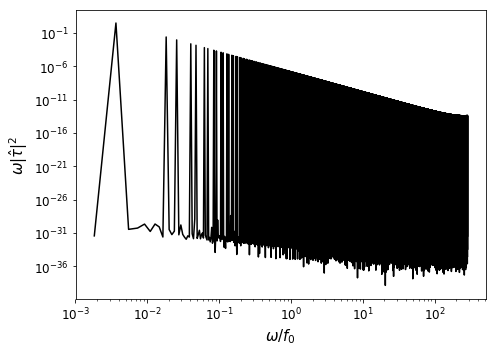

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
fig.set_tight_layout(True)
ax.plot(tauf.freq_time[155521:]*np.abs(f0/(2*np.pi))**-1, tauf[155521:]*tauf.freq_time[155521:], 'k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\omega/f_0$", fontsize=15)
ax.set_ylabel(r"$\omega |\hat{\tau}|^2$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [20]:
(180*86400)**-1*np.abs(f0/(2*np.pi))**-1

0.0036728309174964844

In [21]:
2*360*86400/40

1555200.0